In [1]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
	parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
	sys.path.append(p)

# And standard list of subdirectories
if '%s\\pyuoi' % p not in sys.path:
	sys.path.append('%s\\pyuoi' % p)

from pyuoi.linear_model.lasso import UoI_Lasso
from pyuoi.linear_model.elasticnet import UoI_ElasticNet

if '%s\\uoicorr' % p not in sys.path:
    sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [5]:
data = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01162019b')

In [7]:
dat = []
dat.append(data.loc[data['betadist'] == 'laplace'])
dat.append(data.loc[data['betadist'] == 'uniform'])
dat.append(data.loc[data['betadist'] == 'inversexp'])
dat.append(data.loc[data['betadist'] == 'clustered'])

In [14]:
data.iloc[15]

beta_hats               [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
betadist                                                          uniform
betas                   [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
block_size                                                           1000
cov_params                                             {'correlation': 0}
cov_type                                                            block
est_score                                                              r2
exp_type                                                               EN
fn                                             [6.0, 5.0, 7.0, 8.0, 12.0]
fp                                    [524.0, 585.0, 571.0, 588.0, 543.0]
kappa                                                                 0.3
l1_ratios                          [0.1, 0.2, 0.5, 0.75, 0.9, 0.95, 0.99]
n_alphas                                                               48
n_features                            

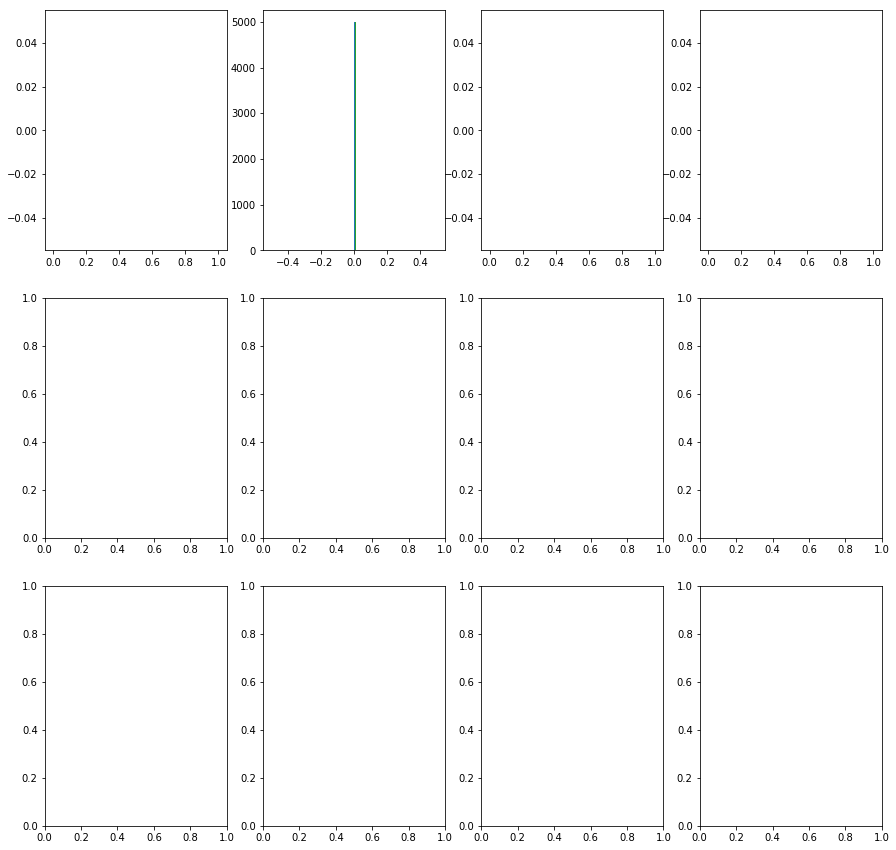

In [10]:
# Plot prediction accuracy, selection accuracy, estimation error

# Need to understand estimation error and run more simulations for estimation variability 
fig, ax = plt.subplots(3, 4, figsize = (15, 15))

for i, d in enumerate(dat):
    full = d.loc[d['sparsity'] == 1]
    ax[0, i].hist(full.betas.ravel(), bins = 100)
#   ax[1, i].plot(d.iloc[:, 7].values, '-o')
#    ax[2, i].plot((1000 - d.iloc[:, 5].values - d.iloc[:, 6].values)/1000, '-o')



In [15]:
x = [1, 2, 3, 0, 0, 4, 0, 5]

In [23]:
np.nonzero(x)[0].astype(int)

array([0, 1, 2, 5, 7])

In [29]:
[x[j] for j in np.nonzero(x)[0]]

[1, 2, 3, 4, 5]